In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from linear_regression import LinearRegression
from gradient_descent import GradientDescent, quad, quadGrad
%matplotlib inline

##### Replicate Graphs from Bishop

regression weights for M = 0
[ 0.1862995]


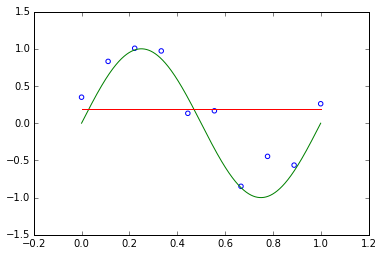

regression weights for M = 1
[ 0.82021246 -1.26782593]


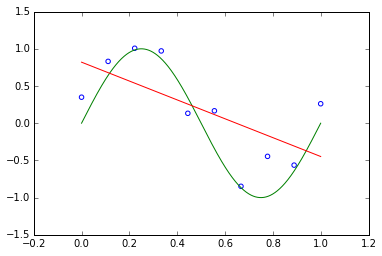

regression weights for M = 3
[  0.31370273   7.98537103 -25.42610224  17.37407653]


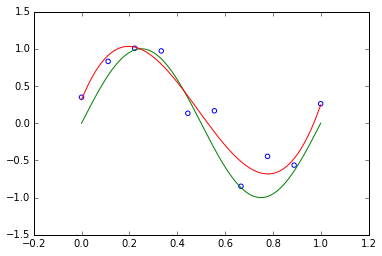

regression weights for M = 9
[  3.49446556e-01   2.32412798e+02  -5.32285881e+03   4.85776357e+04
  -2.31683243e+05   6.40162263e+05  -1.06199735e+06   1.04259131e+06
  -5.57784187e+05   1.25223931e+05]


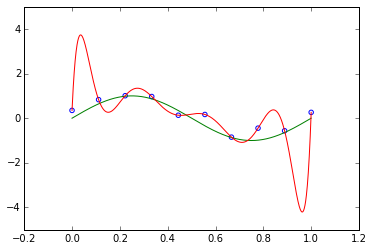

In [2]:
def plotReg(M):
    lr = LinearRegression.fromFile(filename, M)
    w = lr.reg()
    print "regression weights for M = " + str(M)
    print w
    plot(lr,w)
    
def plot(lr,w):
    # plot sin(2*phi*x) in green
    x = np.linspace(0,1,1000)
    sin_x = np.sin(2*np.pi*x)
    lr_temp = LinearRegression(x,x,lr.numFeatures-1)
    reg_prediction = np.dot(lr_temp.phi,w)
    plt.plot(x,sin_x, color='g')
    plt.plot(x, reg_prediction, color='r')
    plt.scatter(lr.x, lr.y, color='b', marker='o',facecolors='none')
    plt.show()
    
filename = 'curvefitting.txt'
M_vals = (0,1,3,9)
for m in M_vals:
    plotReg(m)

#### Apply gradient descent to SSE

 
--- Minimization Summary --- 
x_min is = [  0.31671143   7.94081973 -25.31393964  17.30136664]
f_min is = 0.349681392372
achieved tolerance = -9.99723459572e-09
numFunctionCalls = 34144
---------------------------- 
 


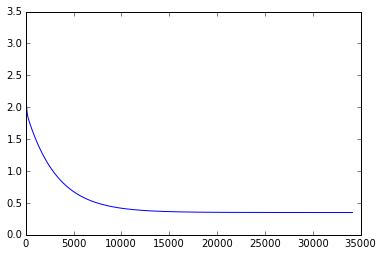

 
--- Scipy Minimization Summary --- 
x_min is = [  0.31370034   7.98538401 -25.42611334  17.37407596]
f_min is = 0.349649887758
numFunctionCalls = 114
---------------------------- 
 
|w_gd - w_ols|^2 is
0.140941928614
 
--- Linear Regression Results ---
x_min is = [  0.31370273   7.98537103 -25.42610224  17.37407653]
f_min is = 0.349649887744
|w_gd - w_ols|^2 is
0.140929231297
|w_scipy - w_ols|^2 is
1.72540141343e-05


In [19]:
def gradDescentSSE(M):
    lr = LinearRegression.fromFile(filename, M)
    w_initial = -1*lr.reg()
    w_initial = 0.0*lr.reg()
    gd = GradientDescent(lr.SSE, lr.SSE_gradient)
    gd.stepSize = 0.05
    gd.tol = 1e-8
    (w, sse, _, _) = gd.computeMin(w_initial, printSummary=True, storeIterValues=True, useGradientCriterion=False, maxFunctionCalls=50000)
    gd.plotIterValues()
    
    res = opt.minimize(lr.SSE, w_initial)
    print " "
    print "--- Scipy Minimization Summary --- "
    print "x_min is = " + str(res.x)
    print "f_min is = " + str(res.fun)
    print "numFunctionCalls = " + str(res.nfev)
#     print "numIterations = " + str(res.nit)
    print "---------------------------- "
    print " "
    
    print "|w_gd - w_ols|^2 is"
    print np.linalg.norm(w - res.x)
    
    w_reg = lr.reg()
    print " "
    print "--- Linear Regression Results ---"
    print "x_min is = " + str(w_reg)
    print "f_min is = " + str(lr.SSE(lr.reg()))
    
    print "|w_gd - w_ols|^2 is"
    print np.linalg.norm(w - w_reg)
    
    print "|w_scipy - w_ols|^2 is"
    print np.linalg.norm(res.x - w_reg)
    
    
    return (lr, gd, w, sse)

M = 3
(lr, gd, w, sse) = gradDescentSSE(M)


In [16]:
38000/114*1.0

333.0